In [539]:
%run "/Users/matteograsso/boxsync/pyphi_invariants/pyramid_large/invariant_module.ipynb"
%run "/Users/matteograsso/boxsync/pyphi_invariants/pyramid_large/picklejar/pickling_concepts_code.ipynb"

## Connectivity matrix and connection weights

In [85]:
# Set network info (name, version, state) to save and identify results
network_name = "largepyr"
network_version = "1.0"
network_state = "alloff"

In [441]:
# Create new dir to store network info and pickled concepts
new_dir_dict = create_directory(network_name, network_version, network_state)
new_dir = (f"{new_dir_dict['curr_dir']}/{new_dir_dict['name']}_{new_dir_dict['vers']}_{new_dir_dict['state']}")

In [87]:
## Remove dir
#os.rmdir(new_dir)

In [88]:
n_nodes = 28
n_states = 2 ** n_nodes
node_labels = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',\
              'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h')

In [89]:
ic = 1 # input connection
ei = 1 # external input 
nc = -2 # inhibition
bc = 0.01 # backward connection
gc = 0.02 # grid lateral connection
sg = 1 # grid self-connection
sc = 0.01 # default self-connection
all_weights = np.array([
    [sg, gc, 0, 0, 0, 0, 0, 0, gc, 0, 0, 0, 0, 0, 0, bc, 0, 0, 0, 0, ei, 0, 0, 0, 0, 0, 0, 0], # A
    [gc, sg, gc, 0, 0, 0, 0, 0, gc, gc, 0, 0, 0, 0, 0, bc, 0, 0, 0, 0, 0, ei, 0, 0, 0, 0, 0, 0], # B
    [0, gc, sg, gc, 0, 0, 0, 0, 0, gc, gc, 0, 0, 0, 0, 0, bc, 0, 0, 0, 0, 0, ei, 0, 0, 0, 0, 0], # C
    [0, 0, gc, sg, gc, 0, 0, 0, 0, 0, gc, gc, 0, 0, 0, 0, bc, 0, 0, 0, 0, 0, 0, ei, 0, 0, 0, 0], # D
    [0, 0, 0, gc, sg, gc, 0, 0, 0, 0, 0, gc, gc, 0, 0, 0, 0, bc, 0, 0, 0, 0, 0, 0, ei, 0, 0, 0], # E
    [0, 0, 0, 0, gc, sg, gc, 0, 0, 0, 0, 0, gc, gc, 0, 0, 0, bc, 0, 0, 0, 0, 0, 0, 0, ei, 0, 0], # F
    [0, 0, 0, 0, 0, gc, sg, gc, 0, 0, 0, 0, 0, gc, gc, 0, 0, 0, bc, 0, 0, 0, 0, 0, 0, 0, ei, 0], # G
    [0, 0, 0, 0, 0, 0, gc, sg, 0, 0, 0, 0, 0, 0, gc, 0, 0, 0, bc, 0, 0, 0, 0, 0, 0, 0, 0, ei], # H
    [gc, gc, 0, 0, 0, 0, 0, 0, sg, gc, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ei, ei, 0, 0, 0, 0, 0, 0], # I
    [0, gc, gc, 0, 0, 0, 0, 0, gc, sg, gc, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ei, ei, 0, 0, 0, 0, 0], # J
    [0, 0, gc, gc, 0, 0, 0, 0, 0, gc, sg, gc, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ei, ei, 0, 0, 0, 0], # K
    [0, 0, 0, gc, gc, 0, 0, 0, 0, 0, gc, sg, gc, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ei, ei, 0, 0, 0], # L
    [0, 0, 0, 0, gc, gc, 0, 0, 0, 0, 0, gc, sg, gc, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ei, ei, 0, 0], # M
    [0, 0, 0, 0, 0, gc, gc, 0, 0, 0, 0, 0, gc, sg, gc, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ei, ei, 0], # N
    [0, 0, 0, 0, 0, 0, gc, gc, 0, 0, 0, 0, 0, gc, sg, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ei, ei], # O
    [ic, ic, 0, 0, 0, 0, 0, 0, nc, nc, 0, 0, 0, 0, 0, sc, 0, 0, 0, bc, 0, 0, 0, 0, 0, 0, 0, 0], # P
    [0, 0, ic, ic, 0, 0, 0, 0, 0, nc, nc, nc, 0, 0, 0, 0, sc, 0, 0, bc, 0, 0, 0, 0, 0, 0, 0, 0], # Q
    [0, 0, 0, 0, ic, ic, 0, 0, 0, 0, 0, nc, nc, nc, 0, 0, 0, sc, 0, bc, 0, 0, 0, 0, 0, 0, 0, 0], # R
    [0, 0, 0, 0, 0, 0, ic, ic, 0, 0, 0, 0, 0, nc, nc, 0, 0, 0, sc, bc, 0, 0, 0, 0, 0, 0, 0, 0], # S
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ic, ic, ic ,ic, sc, 0, 0, 0, 0, 0, 0, 0, 0], # T
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # a
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # b
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # c
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # d
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # e
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # f
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], # g
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # h
])

input_indices = [
    [20], # A
    [21], # B
    [22], # C
    [23], # D
    [24], # E
    [25], # F
    [26], # G
    [27], # H
    [20, 21], # I
    [21, 22], # J
    [22, 23], # K
    [23, 24], # L
    [24, 25], # M
    [25, 26], # N
    [26, 27], # O
    [0, 1], # P
    [2, 3], # Q
    [4, 5], # R
    [6, 7], # S
    [15, 16, 17, 18], # T
    [], # a
    [], # b
    [], # c
    [], # d
    [], # e
    [], # f
    [], # g
    [] # h
]

modulation_indices = [
    [0, 1, 8, 15], # A
    [0, 1, 2, 8, 9, 15], # B
    [1, 2, 3, 9, 10, 16], # C
    [2, 3, 4, 10, 11, 16], # D
    [3, 4, 5, 11, 12, 17], # E
    [4, 5, 6, 12, 13, 17], # F
    [5, 6, 7, 13, 14, 18], # G
    [6, 7, 14, 18], # H
    [0, 1, 8, 9], # I
    [1, 2, 8, 9, 10], # J
    [2, 3, 9, 10, 11], # K
    [3, 4, 10, 11, 12], # L
    [4, 5, 11, 12, 13], # M
    [5, 6, 12, 13, 14], # N
    [6, 7, 13, 14], # O
    [8, 9, 15, 19], # P
    [9, 10, 11, 16, 19], # Q
    [11, 12, 13, 17, 19], # R
    [13, 14, 18, 19], # S
    [19], # T
    [], # a
    [], # b
    [], # c
    [], # d
    [], # e
    [], # f
    [], # g
    [] # h
]


cm = np.abs(np.where(all_weights != 0, 1, 0))

# Transpose our (receiving, sending) CM to use the PyPhi convention of (sending, recieving)
cm = np.transpose(cm)

cm

array([[1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 

## Gate functions and default output value

In [90]:
df_output_value = 0.95

gate_types = [
    "M1", # A
    "M1", # B
    "M1", # C
    "M1", # D
    "M1", # E
    "M1", # F
    "M1", # G
    "M1", # H
    "M2", # I
    "M2", # J
    "M2", # K
    "M2", # L
    "M2", # M
    "M2", # N
    "M2", # O
    "M1", # P
    "M1", # Q
    "M1", # R
    "M1", # S
    "M1", # T
    [], # a 
    [], # b
    [], # c
    [], # d
    [], # e
    [], # f
    [], # g
    [] # h
]

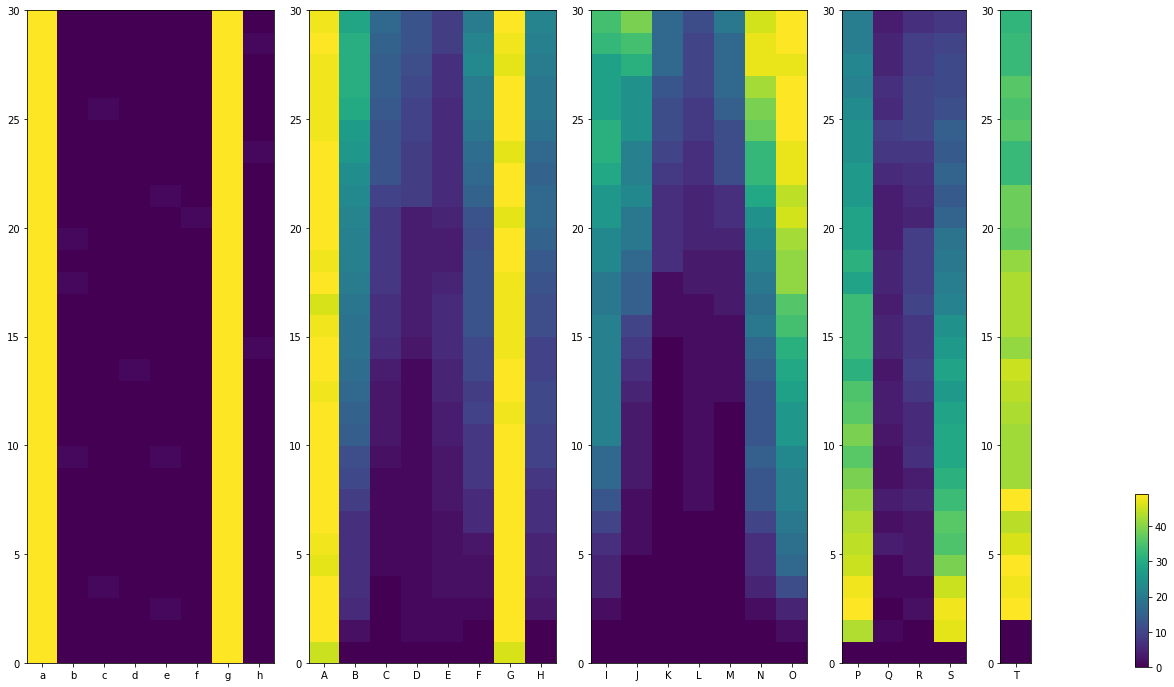

In [438]:
layers = [
    ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'],
    ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'],
    ['I', 'J', 'K', 'L', 'M', 'N', 'O'],
    ['P', 'Q', 'R', 'S'],
    ['T']
]

test_state = ['a', 'g']
test_index = find_le_index_by_label(test_state)

data = behavior(test_index)  
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=len(layers), sharey=True, figsize=(18, 12))
ax_list = fig.axes
gs = gridspec.GridSpec(1, 5, width_ratios=[len(layer) for layer in layers])
c = None
for l in range(len(layers)):
    partial_data = data.loc[:, layers[l][0]:layers[l][-1]]
    ax_list[l] = plt.subplot(gs[l])
    c = ax_list[l].pcolor(partial_data)
    ax_list[l].set_xticks(np.arange(partial_data.shape[1]) + 0.5, minor=False)
    ax_list[l].set_xticklabels(partial_data.columns)

cbaxes = fig.add_axes([0.98, 0.12, 0.01, 0.2]) 
fig.colorbar(c, cax = cbaxes)
# fig.colorbar(c, pad=0.1)

## Entire System 

In [439]:
relevant_nodes = [i for i in range(n_nodes-8)]
markov_blankets = find_markov_blankets(relevant_nodes)
tpm = built_tpm_for_subsys(relevant_nodes, markov_blankets)


In [442]:
# Save tpm to network dir
with open(f"{new_dir}/{network_name}_{network_version}_{network_state}_tpm.file", "wb") as f:
    pickle.dump(tpm, f, pickle.HIGHEST_PROTOCOL)
with open(f"{new_dir}/{network_name}_{network_version}_{network_state}_tpm.file", "rb") as f:
    tpm = pickle.load(f)

In [443]:
subsystem_labels = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T')
state = tuple([0]*len(relevant_nodes))
subsystem_cm = []
for a in relevant_nodes:
    row = []
    for b in relevant_nodes:
        row.append(cm[a][b])
    subsystem_cm.append(row)
subsystem_cm = np.array(subsystem_cm)

network = pyphi.Network(tpm, cm=subsystem_cm, node_labels=subsystem_labels)
subsystem = pyphi.Subsystem(network, state, range(network.size))
A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, P, Q, R, S, T = subsystem.node_indices

pyphi.config.REPR_VERBOSITY = 1

In [542]:
pickle_concepts((0,1),(1,))

In [583]:
pickle2concept('A')

mechanism                                                 (A, P, T)
phi                                                        0.006125
cause_purview                                 (A, B, I, P, Q, R, S)
cause_phi                                                  0.103933
cause_mip         (((0, 15), (0, 1, 8)), ((19,), (15, 16, 17, 18)))
effect_purview                                            (A, P, T)
effect_phi                                                 0.006125
effect_mip                    (((0, 15), (0, 15, 19)), ((19,), ()))
dtype: object